# Phonon mode analysis in theta-space
The dataset generated by `twist_ph.py` in theta-space mode is a matrix of phonon modes at a certain k-point over a sampled set of twist angles. This notebook shows a visualization of these modes for each k-point.

In [1]:
import numpy as np
import numpy.linalg as LA
import matplotlib.pyplot as plt
from itertools import product as prod
from __class_PhononConfig import TwistedRealspacePhonon
from pymatgen.io.vasp.inputs import Poscar
%matplotlib inline

In [2]:
ROOT = '/Users/jonathanlu/Documents'
DIRNAME = "tvMoS2"
THSPC_DIR = "theta"

In [3]:
# Change as necessary
th_min, th_max, ntheta = np.loadtxt(f"{ROOT}/{DIRNAME}/theta.txt")
ntheta = int(ntheta)
KPT = 'Gamma'
print(f"{ntheta} angles from {th_min} to {th_max}")

101 angles from 0.01 to 10.0


In [4]:
# Import dataset from the directory
log_name = r'$\Gamma$' if KPT == 'Gamma' else KPT
path = f'{ROOT}/{DIRNAME}/{THSPC_DIR}/{KPT}/thspc_modes.npy'
poscars_uc = [Poscar.from_file(f'{ROOT}/{DIRNAME}/POSCAR_LAYER{i+1}') for i in range(2)]
dataset = np.load(path)
nmodes = dataset.shape[1]
print("Dataset shape:", dataset.shape)
print("Number of modes:", nmodes)
thetas = np.linspace(th_min, th_max, ntheta)

DMs = np.load(f'{ROOT}/{DIRNAME}/{THSPC_DIR}/{KPT}/dms.npy')
GM_set = np.load(f'{ROOT}/{DIRNAME}/{THSPC_DIR}/{KPT}/GM_set.npy')
k_set = np.load(f'{ROOT}/{DIRNAME}/{THSPC_DIR}/{KPT}/k_set.npy')
bl_M = np.load(f'{ROOT}/{DIRNAME}/{THSPC_DIR}/{KPT}/masses.npy')
mesh = np.load(f'{ROOT}/{DIRNAME}/{THSPC_DIR}/{KPT}/thspc_mesh.npy')
print(f"Mesh shape: {mesh.shape}")

Dataset shape: (101, 20)
Number of modes: 20
Mesh shape: (101, 1521, 2)


Analyzing theta = 3.4066 (idx=34)
Coords shape: (1521, 2)


<Figure size 432x288 with 0 Axes>

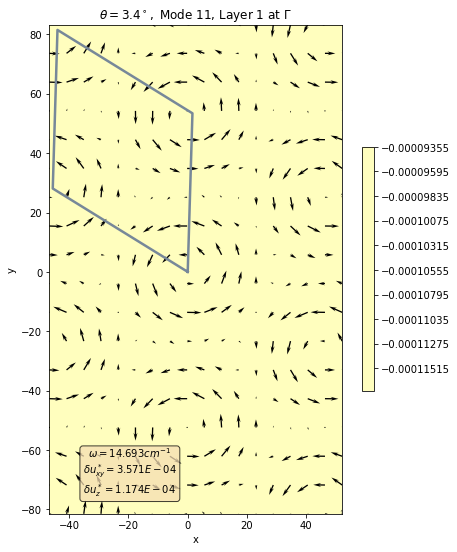

<Figure size 432x288 with 0 Axes>

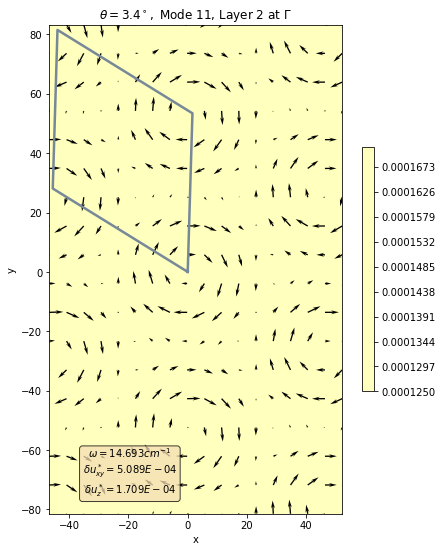

In [36]:
# Visualize the real-space phonons
THETA_IDX = 34
WHICH_MODE = 11
print(f"Analyzing theta = {thetas[THETA_IDX]} (idx={THETA_IDX})")
coords = mesh[THETA_IDX]
print(f"Coords shape: {coords.shape}")

ph = TwistedRealspacePhonon(thetas[THETA_IDX], k_set[THETA_IDX], 
                            GM_set[THETA_IDX], DMs[THETA_IDX], 6, 
                            bl_M, poscars_uc, modeidxs=np.arange(nmodes))
ph.plot_a_phonon(WHICH_MODE)

In [50]:
# Find indices of key modes, manually
LB_idxs = np.zeros(ntheta).astype(int)
LB_idxs[73:] = 5
LB_idxs[27:73] = 11
LB_idxs[9:27] = 17
LB_idxs[5:9] = 19 # 23
LB_idxs[:5] = 19 # 25

S_idxs = np.zeros(ntheta).astype(int)
S_idxs[77:] = 4
S_idxs[10:77] = 1
S_idxs[7:10] = 16
S_idxs[:7] = 19 # 21

In [52]:
# Extract the mode list from the indices
LB_modes = np.zeros(ntheta)
S_modes = np.zeros(ntheta)

for i in range(ntheta):
    LB_modes[i] = dataset[i, LB_idxs[i]]
    S_modes[i] = dataset[i, S_idxs[i]]

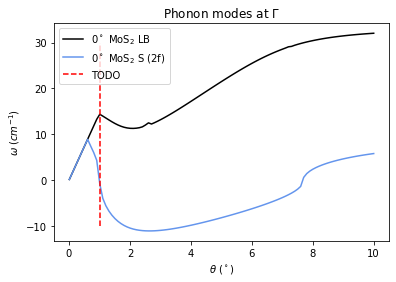

In [53]:
# Plot LB mode
plt.plot(thetas, LB_modes, c='k', label=r'$0^\circ$ MoS$_2$ LB')
plt.plot(thetas, S_modes, c='cornflowerblue', label=r'$0^\circ$ MoS$_2$ S (2f)')
plt.plot([1]*2, [-10, 30], '--', c='red', label="TODO")
plt.title(f"Phonon modes at " + log_name)
plt.xlabel(r'$\theta$ ($^\circ$)')
plt.ylabel(r'$\omega$ $(cm^{-1})$')
plt.legend()

# for i, theta in enumerate(thetas):
#     idx = 5
#     plt.scatter(theta, dataset[i,idx], c='k', s=3, label='LB')
plt.show()